In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
data = pd.read_csv("/content/regression_dataset.csv")
data.head(5)

,x_simple,y_simple,x1_multiple,x2_multiple,x3_multiple,y_multiple,x_poly,y_poly
0,37.454012,199.011001,79.481130,35.597268,14.299168,366.991911,3.560967,43.747073
1,95.071431,479.377006,50.263709,75.784611,76.151063,608.374021,9.865152,229.988703
2,73.199394,377.832186,57.690388,1.439349,61.821806,409.735124,6.057748,105.717550
3,59.865848,269.577864,49.251769,11.607264,10.112268,230.104405,2.372268,24.091695
4,15.601864,83.615882,19.524299,4.600264,8.410681,69.387534,1.017825,15.483240


In [22]:
#Descriptive statistics
print(data.describe())

         x_simple    y_simple  x1_multiple  x2_multiple  x3_multiple  \
count  100.000000  100.000000   100.000000   100.000000   100.000000   
mean    47.018074  245.068764    52.829227    49.431411    53.707375   
std     29.748941  147.120921    28.769547    30.157013    32.115562   
min      0.552212   14.225160     1.545662     1.083765     1.135364   
25%     19.320076  115.122685    29.182920    26.033886    27.638766   
50%     46.414245  235.161044    54.593565    49.301809    57.088651   
75%     73.020312  378.732277    77.619799    75.536868    82.648511   
max     98.688694  519.079926    99.005385    99.050514    99.296480   

       y_multiple      x_poly      y_poly  
count  100.000000  100.000000  100.000000  
mean   472.008688    4.948052   89.998905  
std    170.910736    2.860583   69.229876  
min     69.387534    0.518235    4.242203  
25%    368.027286    2.411140   28.273730  
50%    481.711216    4.763581   66.798654  
75%    576.181054    7.625441  152.951651  

In [23]:
print(data.shape)

(100, 8)


In [24]:
# Check for missing values
print(data.isnull().sum())

x_simple       0
y_simple       0
x1_multiple    0
x2_multiple    0
x3_multiple    0
y_multiple     0
x_poly         0
y_poly         0
dtype: int64


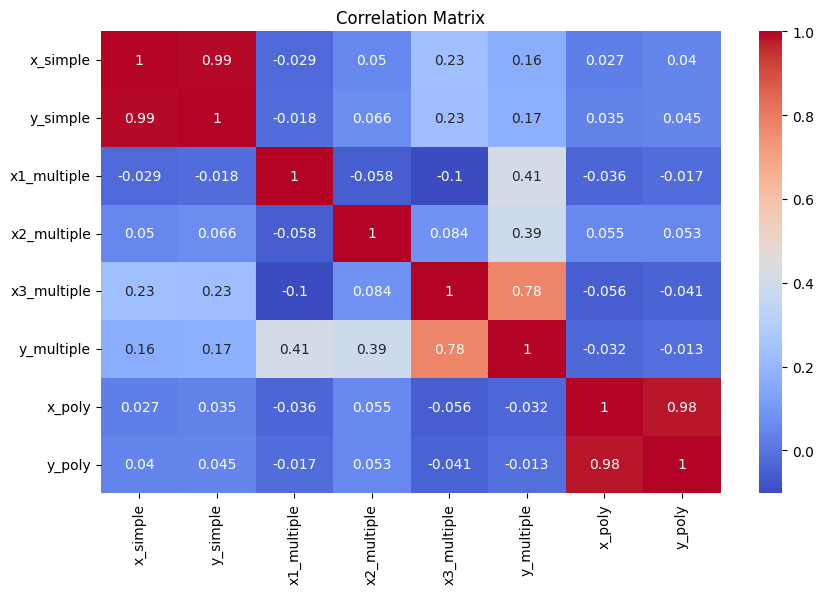

In [25]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

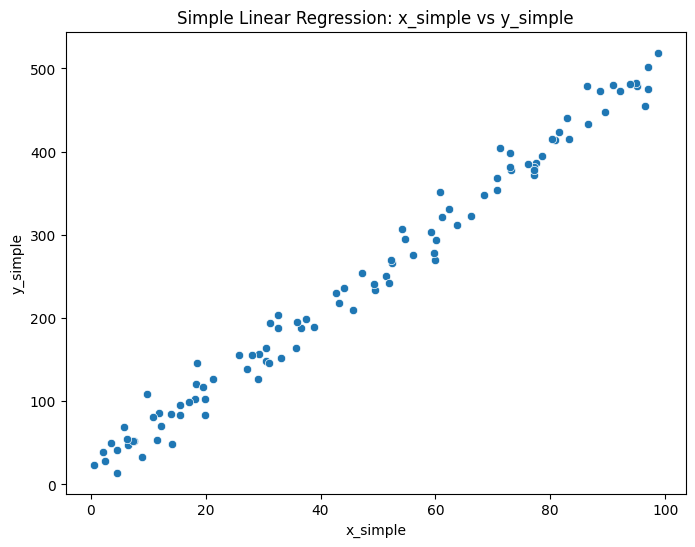

In [26]:
# Scatter plot for simple linear regression
plt.figure(figsize=(8,6))
sns.scatterplot(x='x_simple', y='y_simple', data=data)
plt.title('Simple Linear Regression: x_simple vs y_simple')
plt.xlabel('x_simple')
plt.ylabel('y_simple')
plt.show()

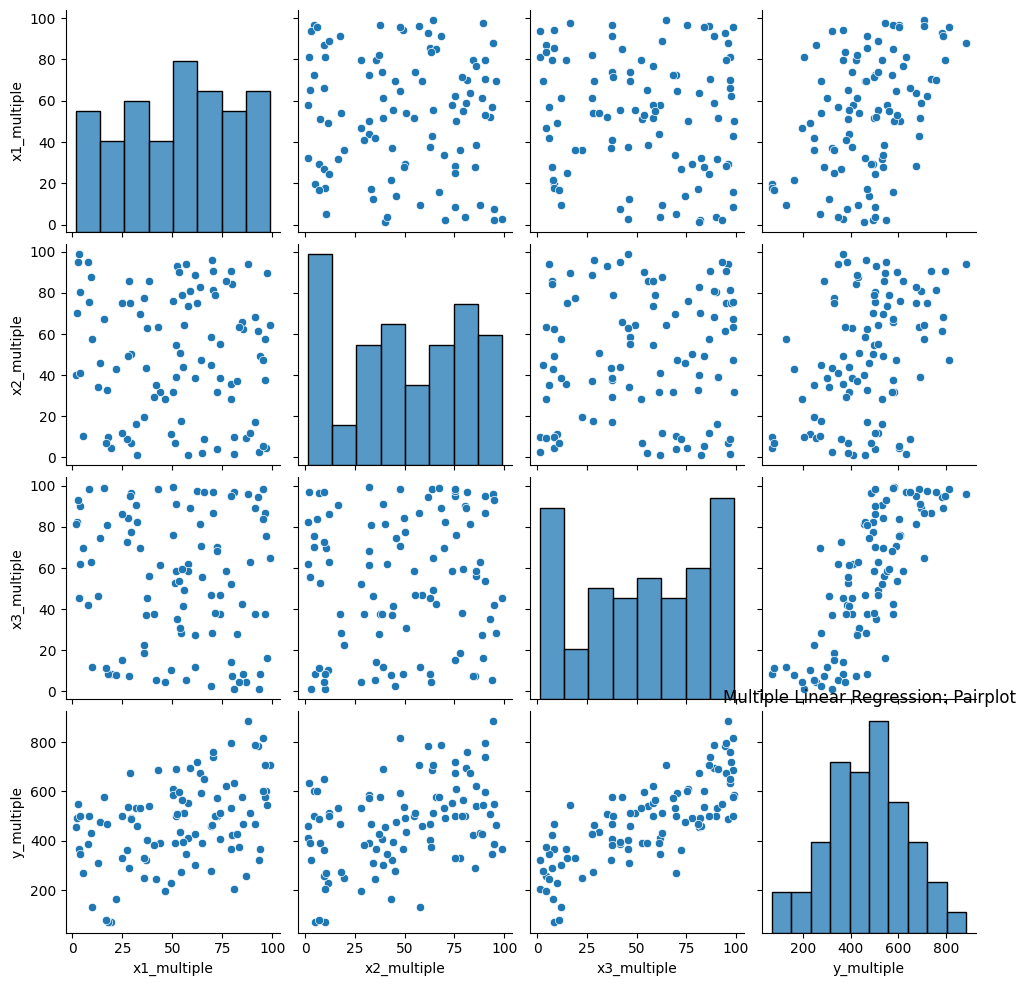

In [27]:
# Pairplot to visualize relationships in multiple linear regression
sns.pairplot(data[['x1_multiple', 'x2_multiple', 'x3_multiple', 'y_multiple']])
plt.title('Multiple Linear Regression: Pairplot')
plt.show()

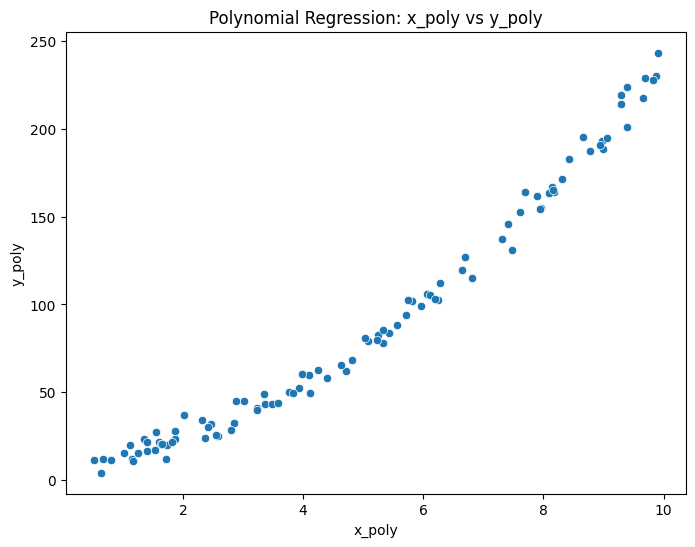

In [28]:
# Scatter plot for polynomial regression
plt.figure(figsize=(8,6))
sns.scatterplot(x='x_poly', y='y_poly', data=data)
plt.title('Polynomial Regression: x_poly vs y_poly')
plt.xlabel('x_poly')
plt.ylabel('y_poly')
plt.show()

In [29]:
#Regression Models
# a. Simple Linear Regression

X_simple = data[['x_simple']]
y_simple = data['y_simple']

# Split the data into train and test sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [30]:
# Build the model
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [31]:
# Predict
y_pred_simple = lr_simple.predict(X_test_simple)

In [32]:
# Evaluate the model
print(f"Simple Linear Regression R^2: {r2_score(y_test_simple, y_pred_simple)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_simple, y_pred_simple)}")

Simple Linear Regression R^2: 0.9889180712579216
Mean Squared Error: 261.4798054868004


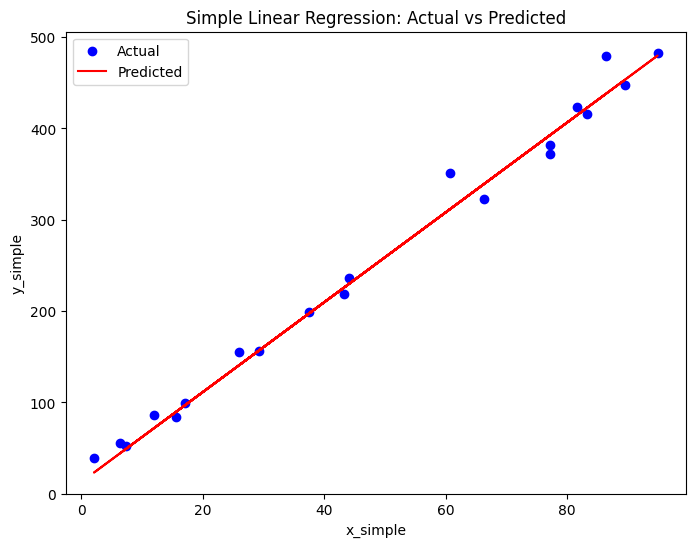

In [33]:
# Plot the regression line
plt.figure(figsize=(8,6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicted')
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.xlabel('x_simple')
plt.ylabel('y_simple')
plt.legend()
plt.show()

In [34]:
# Multiple Linear Regression
X_multiple = data[['x1_multiple', 'x2_multiple', 'x3_multiple']]
y_multiple = data['y_multiple']

# Split the data into train and test sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

In [35]:
# Build the model
lr_multiple = LinearRegression()
lr_multiple.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [36]:
# Predict
y_pred_multiple = lr_multiple.predict(X_test_multiple)

In [37]:
# Evaluate the model
print(f"Multiple Linear Regression R^2: {r2_score(y_test_multiple, y_pred_multiple)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_multiple, y_pred_multiple)}")

Multiple Linear Regression R^2: 0.9500397886959305
Mean Squared Error: 1273.921003742052


In [39]:
# Polynomial Regression
X_poly = data[['x_poly']]
y_poly = data['y_poly']

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly_transformed = poly.fit_transform(X_poly)

# Split the data into train and test sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_transformed, y_poly, test_size=0.2, random_state=42)

In [40]:
# Build the model
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

In [41]:
# Predict
y_pred_poly = lr_poly.predict(X_test_poly)

In [42]:
# Evaluate the model
print(f"Polynomial Regression R^2: {r2_score(y_test_poly, y_pred_poly)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_poly, y_pred_poly)}")

Polynomial Regression R^2: 0.9944205844774708
Mean Squared Error: 25.2951663320534


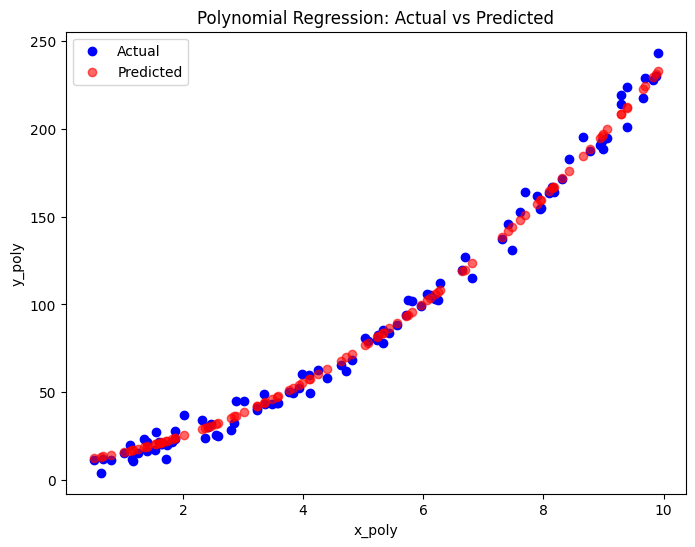

In [43]:
# Plot actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(X_poly, y_poly, color='blue', label='Actual')
plt.scatter(X_poly, lr_poly.predict(poly.transform(X_poly)), color='red', label='Predicted', alpha=0.6)
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('x_poly')
plt.ylabel('y_poly')
plt.legend()
plt.show()